# Visualisation of AMSIMP

In [1]:
# Import dependencies.
import amsimp
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import pylab

# Define level of detail.
detail = amsimp.Wind(3)

## Geostrophic Wind Contour Plots

### Standard Contour Plot

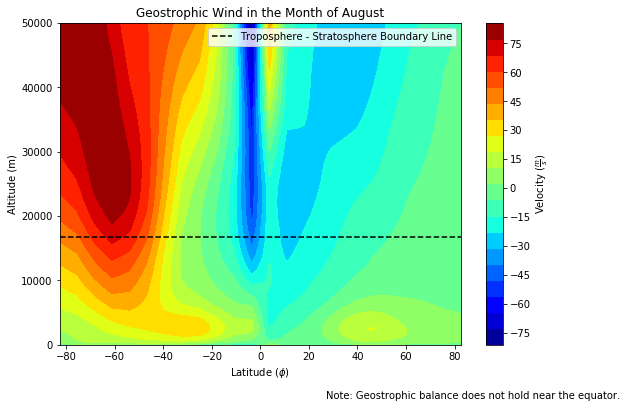

In [2]:
%matplotlib inline

plt.figure(figsize=(9, 6))
detail.wind_contourf()

### Contour plot, overlayed by wind vectors, with axes being transformed onto a Nearside Projection

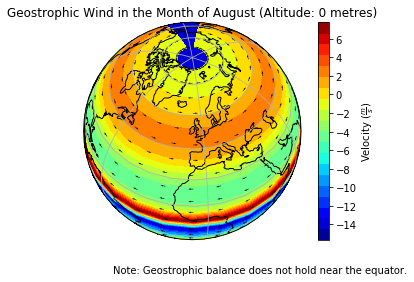

In [3]:
detail.globe()

## Precipitable Water Contour Plot

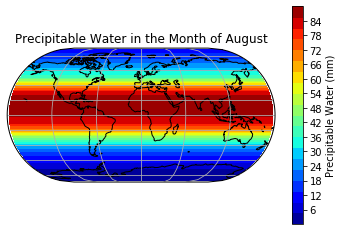

In [4]:
# Define level of detail.
detail = amsimp.Water(4)

detail.water_contourf()

## Tempestas Praenuntientur @ AMSIMP (August 2019)

In [5]:
%%HTML
<video width="720" height="500" controls autoplay loop>
  <source src="august/weather.mp4" type="video/mp4">
</video>

## Visualisation of Benchmark Results

In [6]:
# Change the working directory to the parent directory
import os
os.chdir("..")

In [7]:
# MacBook Air (Retina, 13-inch, 2018) results.
data_mac = pd.read_csv('benchmarking/macbook_benchmark.csv')
max_detail_level = 5
data_mac = data_mac.sort_values(['detail_level', 'time'], ascending = [True, True])
# Custom PC Desktop Build results.
data_windows = pd.read_csv('benchmarking/windows_benchmark.csv')
data_windows = data_windows.sort_values(['detail_level', 'time'], ascending = [True, True])
# Google Cloud Platform Compute Engine g1-small results.
data_vm = pd.read_csv('benchmarking/google_benchmark.csv')
data_vm = data_vm.sort_values(['detail_level', 'time'], ascending = [True, True])
# (Purple) Toshiba Satellite L50-B-1NM 
data_linux = pd.read_csv('benchmarking/linux_benchmark.csv')
data_linux = data_linux.sort_values(['detail_level', 'time'], ascending = [True, True])

In [8]:
# Curve of best fit equation.
def fit_method(x, a, b, c):
    return a - (b / c) * (1 - np.exp(-c * x))

guess = [3.72426, -0.001201962, -3.192269]

### Mean Performance Benchmark

MacBook Air (Retina, 13-inch, 2018): [   2.52956116    1.88201168   12.69882371  135.67381494 3222.69008505]
Google Cloud Platform Compute Engine g1-small: [   1.10651236    0.41588025    7.96858175  132.62152464 3233.33460379]
Custom PC Desktop Build: [   1.70089808    1.20244205    9.86240461  115.25446467 2798.96523846]
(Purple) Toshiba Satellite L50-B-1NM: [   2.35275348    1.54134123   17.51990106  242.67723841 5792.15212051]


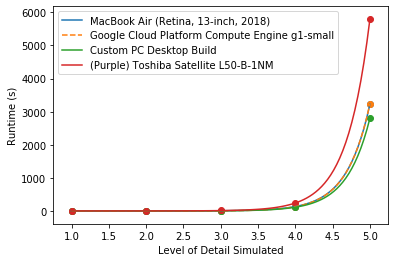

In [9]:
mean_mac = []
mean_vm = []
mean_windows = []
mean_linux = []

# Mac Machine 
for detail in range(max_detail_level):
    mean_mac.append(data_mac[(data_mac['detail_level'] == detail + 1)]['time'].mean())
 
# VM
for detail in range(max_detail_level):
    mean_vm.append(data_vm[(data_vm['detail_level'] == detail + 1)]['time'].mean())

# Windows Machine     
for detail in range(max_detail_level):
    mean_windows.append(data_windows[(data_windows['detail_level'] == detail + 1)]['time'].mean())
    
# Linux
for detail in range(max_detail_level):
    mean_linux.append(data_linux[(data_linux['detail_level'] == detail + 1)]['time'].mean())
    
detail_level = np.arange(1, max_detail_level + 1)

x = detail_level
x_ = np.linspace(1, 5, 100)

mean_mac = np.asarray(mean_mac)
mean_vm = np.asarray(mean_vm)
mean_windows = np.asarray(mean_windows)
mean_linux = np.asarray(mean_linux)

c = curve_fit(fit_method, x, mean_mac, guess)
c = c[0]
y_mac = fit_method(x_, c[0], c[1], c[2])

plt.plot(x_, y_mac, label = 'MacBook Air (Retina, 13-inch, 2018)')
plt.scatter(detail_level, mean_mac)

c = curve_fit(fit_method, x, mean_vm, guess)
c = c[0]
y_vm = fit_method(x_, c[0], c[1], c[2])

plt.plot(x_, y_vm, '--', label = 'Google Cloud Platform Compute Engine g1-small')
plt.scatter(detail_level, mean_vm)

c = curve_fit(fit_method, x, mean_windows, guess)
c = c[0]
y_windows = fit_method(x_, c[0], c[1], c[2])

plt.plot(x_, y_windows, label = 'Custom PC Desktop Build')
plt.scatter(detail_level, mean_windows)

c = curve_fit(fit_method, x, mean_linux, guess)
c = c[0]
y_linux = fit_method(x_, c[0], c[1], c[2])

plt.plot(x_, y_linux, label = "(Purple) Toshiba Satellite L50-B-1NM")
plt.scatter(detail_level, mean_linux)

plt.xlabel('Level of Detail Simulated')
plt.ylabel('Runtime (s)')
pylab.legend(loc='upper left')

np.set_printoptions(suppress=True)

print('MacBook Air (Retina, 13-inch, 2018): ' + str(mean_mac))
print('Google Cloud Platform Compute Engine g1-small: ' + str(mean_vm))
print('Custom PC Desktop Build: ' + str(mean_windows))
print('(Purple) Toshiba Satellite L50-B-1NM: ' + str(mean_linux))

### Median Performance Benchmark

MacBook Air (Retina, 13-inch, 2018): [2.247523546218872, 1.6894564628601074, 11.911523461341858, 135.05507838726044, 3192.8215503692627]
Google Cloud Platform Compute Engine g1-small: [1.1006337404251099, 0.4004253149032593, 7.947224140167236, 132.52921509742737, 3232.19799888134]
Custom PC Desktop Build: [1.6676390171051025, 1.1495376825332642, 9.75572121143341, 114.90531289577484, 2670.3881908655167]
(Purple) Toshiba Satellite L50-B-1NM: [2.0638455152511597, 1.4538400173187256, 17.160704016685486, 242.37272560596466, 5795.358666539192]


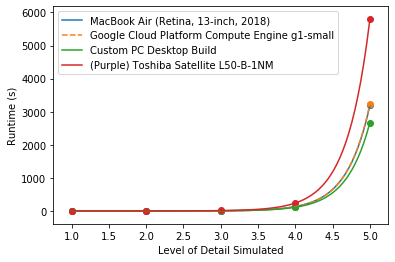

In [10]:
median_mac = []
median_vm = []
median_windows = []
median_linux = []

# Mac Machine 
for detail in range(max_detail_level):
    median_mac.append(data_mac[(data_mac['detail_level'] == detail + 1)]['time'].median())
 
# VM
for detail in range(max_detail_level):
    median_vm.append(data_vm[(data_vm['detail_level'] == detail + 1)]['time'].median())

# Windows Machine     
for detail in range(max_detail_level):
    median_windows.append(data_windows[(data_windows['detail_level'] == detail + 1)]['time'].median())
    
# Linux
for detail in range(max_detail_level):
    median_linux.append(data_linux[(data_linux['detail_level'] == detail + 1)]['time'].median())
    
detail_level = np.arange(1, max_detail_level + 1)

c = curve_fit(fit_method, x, median_mac, guess)
c = c[0]
y_mac = fit_method(x_, c[0], c[1], c[2])

plt.plot(x_, y_mac, label = 'MacBook Air (Retina, 13-inch, 2018)')
plt.scatter(detail_level, median_mac)

c = curve_fit(fit_method, x, median_vm, guess)
c = c[0]
y_vm = fit_method(x_, c[0], c[1], c[2])

plt.plot(x_, y_vm, '--', label = 'Google Cloud Platform Compute Engine g1-small')
plt.scatter(detail_level, median_vm)

c = curve_fit(fit_method, x, median_windows, guess)
c = c[0]
y_windows = fit_method(x_, c[0], c[1], c[2])

plt.plot(x_, y_windows, label = 'Custom PC Desktop Build')
plt.scatter(detail_level, median_windows)

c = curve_fit(fit_method, x, median_linux, guess)
c = c[0]
y_linux = fit_method(x_, c[0], c[1], c[2])

plt.plot(x_, y_linux, label = "(Purple) Toshiba Satellite L50-B-1NM")
plt.scatter(detail_level, median_linux)

plt.xlabel('Level of Detail Simulated')
plt.ylabel('Runtime (s)')
pylab.legend(loc='upper left')

print('MacBook Air (Retina, 13-inch, 2018): ' + str(median_mac))
print('Google Cloud Platform Compute Engine g1-small: ' + str(median_vm))
print('Custom PC Desktop Build: ' + str(median_windows))
print('(Purple) Toshiba Satellite L50-B-1NM: ' + str(median_linux))